##  Fire temperature and Burn Time in Relation to Silvacultural Treatments

#### For the full analysis, skip down to section 3: Analysis.

In [1]:
setwd("/home/zeski/Documents/Data_Science/DataSets/HOBOdataCombined2016")

# Setting my working directory to the desired file.

### Section 1: EDA and Normality Testing 

In [2]:
library(tidyverse)
library(cowplot)
# loading in the package that will be primarily used throughout this entire exploration. 

Logger<-read_csv('HoboLogger.csv')

# Reading in the csv to the logger variable for use throughout this project. 

head(Logger)

# Checking the layout of my dataset

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Parsed with column specification:
cols(
  Treatment = col_character(),
  HOBO = col_character(),
  `Date Time, GMT-04:00` = col_character(),
  TempF = col_double(),
  Intensity = col_integer()
)


Treatment,HOBO,"Date Time, GMT-04:00",TempF,Intensity
Control,p1,3/26/2016 12:00,86.823,1472
Control,p1,3/26/2016 12:15,79.151,10240
Control,p1,3/26/2016 12:30,94.062,16384
Control,p1,3/26/2016 12:45,105.161,14848
Control,p1,3/26/2016 13:00,101.685,10240
Control,p1,3/26/2016 13:15,107.470,15872


 This gives me an idea as to what the layout of my data is. I see that I have one two columns as independent variables. The type of silvacural treatment, and the Hobologgerused. 
 This might pose issues later on down the road. In the case of such issues, I will primarily use the Treatment column and temperature of the fire.
 
 The primary goal of this exploration is to see if the temperature intensity of the fire is dependent upong the silvacultural treatment? This can be accomplished by using an Anova, assuming that the TempF column is of a normal distribution. The sensors were placed randomly within the study area constraints, so the data was taken randomly.  
 
 
 
 Following this, I see that there is a Datae-Time index, this presents the opportunity to check to see how quickly the fire increased and decreased in intensity in individual locations. Could this be compared across all different hobologgers, and see if the treatment has a correlation with how fast the fire increased or decreased in temperature? Could this be a useful comparison across different silvacultural sites.
 


In [3]:
str(Logger)

# This gives me the structure of the dataset, I see that there are 5 variables, and 40250 observations. This gives the names of each variable and their associated data type.

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	40250 obs. of  5 variables:
 $ Treatment           : chr  "Control" "Control" "Control" "Control" ...
 $ HOBO                : chr  "p1" "p1" "p1" "p1" ...
 $ Date Time, GMT-04:00: chr  "3/26/2016 12:00" "3/26/2016 12:15" "3/26/2016 12:30" "3/26/2016 12:45" ...
 $ TempF               : num  86.8 79.2 94.1 105.2 101.7 ...
 $ Intensity           : int  1472 10240 16384 14848 10240 15872 17408 16384 3328 4096 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 5
  .. ..$ Treatment           : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ HOBO                : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Date Time, GMT-04:00: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ TempF               : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ Intensity           : list()
  .. .. ..- attr(*, "class")



  



Right from the get go, I can see that I will probably want to change a couple of the variable types in this dataset

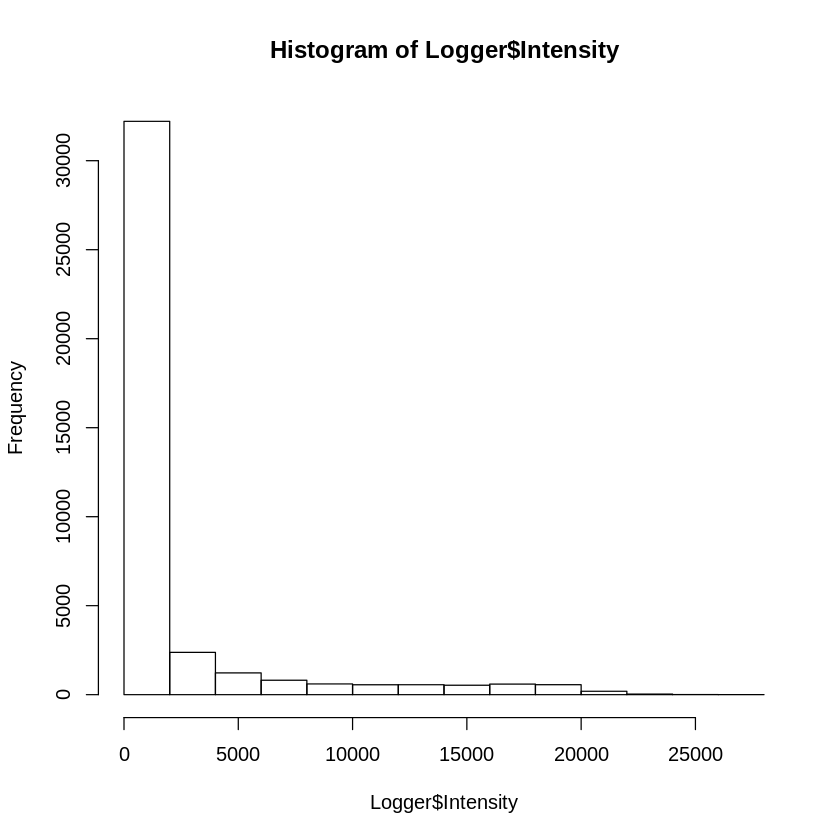

In [4]:
hist( x= Logger$Intensity)

I see an abnormally high amount of data collected around the zero mark. Knowing a little bit about the design of the  experiment, I know that these data most likely represent Hobologgers that have not had exposure to sunlight in their place of recording. These Hobologgers were placed in a shaded area, so therefore the measure of light intensity will not be a factor for these hobologgers. This could present complications for parametric tests down the road.

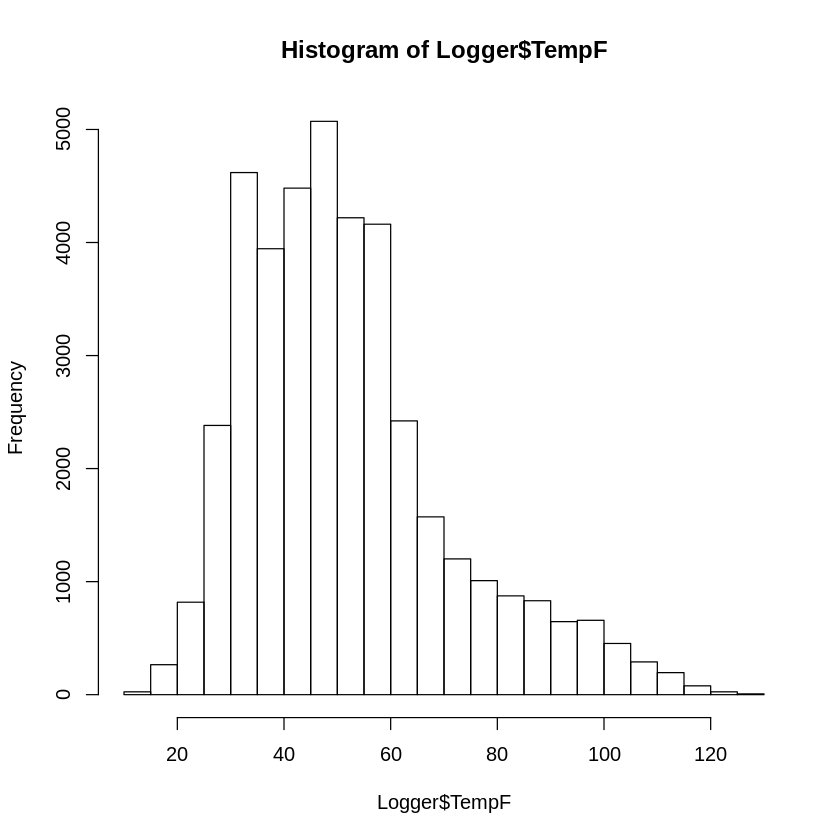

In [5]:
hist(Logger$TempF)

The data collected for the temperature of the forest floor looks to follow a more normal distribution. For further normality analysis, I will have to test further to set aside doubts of a normal distribution. I plan on testing for normailty with the use of the shapiro wilk test.

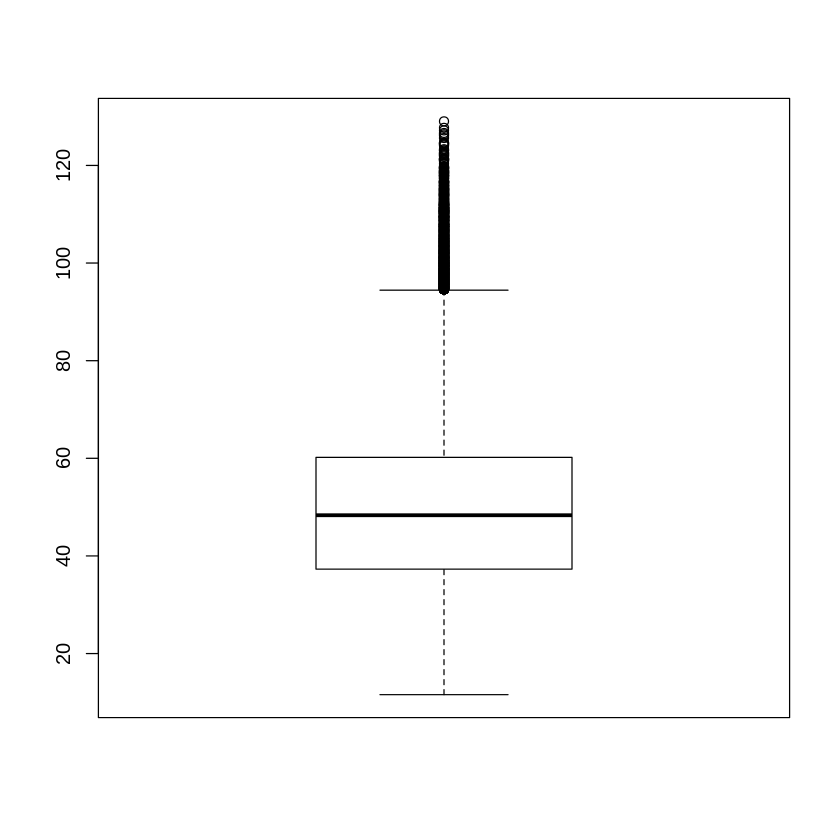

In [6]:
boxplot(Logger$TempF)

There are a lot of outliers in the above dataset.....

This spawns me to check for normality using the tests.

### Assessing Normality for my temperature data

I want to assess whether I have the correct sample size for my data.

The shapiro wilks test is only useful for datasets with less than 5000 samples.

In [7]:
shapiro.test(Logger$TempF[0:5000])


	Shapiro-Wilk normality test

data:  Logger$TempF[0:5000]
W = 0.93418, p-value < 2.2e-16


In [8]:
mean(Logger$TempF)
sd(Logger$TempF)
gamma <- ks.test(Logger$TempF,y='pnorm', mean = 51.81 , sd = 19.256, alternative='two.sided')
print(gamma)

[1] 51.8101

[1] 19.2563

Warning message in ks.test(Logger$TempF, y = "pnorm", mean = 51.81, sd = 19.256, :
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  Logger$TempF
D = 0.083169, p-value < 2.2e-16
alternative hypothesis: two-sided



Examining the p-value above, we will reject the null hypothesis of normality. So the data is of a non normal distribution. Therefore, I will have to use a non parametric test. 

### Kruskill Wallis.

In [9]:
Logger$Treatment <- as.factor(Logger$Treatment)

KLogger <- Logger %>% select(Treatment, TempF)

head(Logger)

Treatment,HOBO,"Date Time, GMT-04:00",TempF,Intensity
Control,p1,3/26/2016 12:00,86.823,1472
Control,p1,3/26/2016 12:15,79.151,10240
Control,p1,3/26/2016 12:30,94.062,16384
Control,p1,3/26/2016 12:45,105.161,14848
Control,p1,3/26/2016 13:00,101.685,10240
Control,p1,3/26/2016 13:15,107.470,15872


In [10]:
names(Logger) = c('Treatment','Hobologger','DateTime', 'Temperature_F','Light Intenisty')

Logger$DateTime <-as.POSIXct(Logger$DateTime, format = "%m/%d/%Y %H:%M")

levels(KLogger$Treatment)

[1] "CCNslash"   "CCslash"    "Control"    "ThinNslash" "ThinSlash"

In [11]:
print(kruskal.test(TempF ~ Treatment, data = KLogger))
KruskalTest <- kruskal.test(TempF ~ Treatment, data = KLogger)


	Kruskal-Wallis rank sum test

data:  TempF by Treatment
Kruskal-Wallis chi-squared = 224.87, df = 4, p-value < 2.2e-16



============================================

Based off of the above p-value, we can see that there are significant differences between the different treatment groups. Therefore, I see that the temperature F is not independent of the Treatment type. Therefore, the TempF is dependent upon the Treatment Type. 

============================================

In [12]:
pairwise.wilcox.test(KLogger$TempF, KLogger$Treatment, 
                    p.adjust.method = 'BH')


	Pairwise comparisons using Wilcoxon rank sum test 

data:  KLogger$TempF and KLogger$Treatment 

           CCNslash CCslash Control ThinNslash
CCslash    < 2e-16  -       -       -         
Control    0.0048   < 2e-16 -       -         
ThinNslash 1.0e-05  < 2e-16 0.1338  -         
ThinSlash  3.0e-15  2.7e-10 1.9e-07 5.0e-05   

P value adjustment method: BH 

### Visual

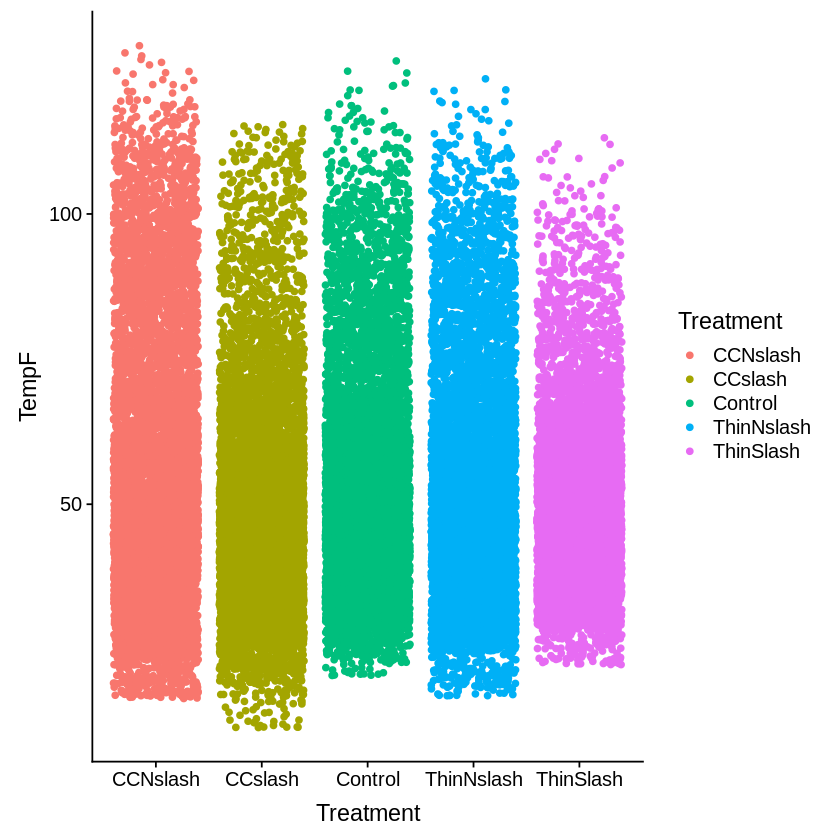

In [13]:
set.seed(12345)
library(ggbeeswarm)

BeeSwarmAll<-ggplot(KLogger, aes(Treatment, TempF, color = Treatment))+geom_jitter()
BeeSwarmAll

## Section 2: Formatting the data for Analysis.

#### Datetime

In [14]:
Logger$Date <- as.Date(Logger$DateTime)

MarLogger <- Logger %>% filter(Date == "2016-03-26")

MarCCNslash   <- MarLogger %>% filter(Treatment == 'CCNslash')
MarCCslash    <- MarLogger %>% filter(Treatment == 'CCslash')
MarControl    <- MarLogger %>% filter(Treatment == 'Control')
MarThinNSlash <- MarLogger %>% filter(Treatment == 'ThinNslash')
MarThinSlash  <- MarLogger %>% filter(Treatment == 'ThinSlash')

Apr4Logger <- Logger %>% filter(Date == "2016-04-04")

Apr4CCNslash   <- Apr4Logger %>% filter(Treatment == 'CCNslash')
Apr4CCslash    <- Apr4Logger %>% filter(Treatment == 'CCslash')
Apr4Control    <- Apr4Logger %>% filter(Treatment == 'Control')
Apr4ThinNSlash <- Apr4Logger %>% filter(Treatment == 'ThinNslash')
Apr4ThinSlash  <- Apr4Logger %>% filter(Treatment == 'ThinSlash')

Apr11Logger  <- Logger %>% filter(Date == "2016-04-11")

Apr11CCNslash   <- Apr11Logger %>% filter(Treatment == 'CCNslash')
Apr11CCslash    <- Apr11Logger %>% filter(Treatment == 'CCslash')
Apr11Control    <- Apr11Logger %>% filter(Treatment == 'Control')
Apr11ThinNSlash <- Apr11Logger %>% filter(Treatment == 'ThinNslash')
Apr11ThinSlash  <- Apr11Logger %>% filter(Treatment == 'ThinSlash')

require(gridExtra)
plot1 <- qplot(1)
plot2 <- qplot(1)
grid.arrange(plot1, plot2, ncol=2)

### Mar28

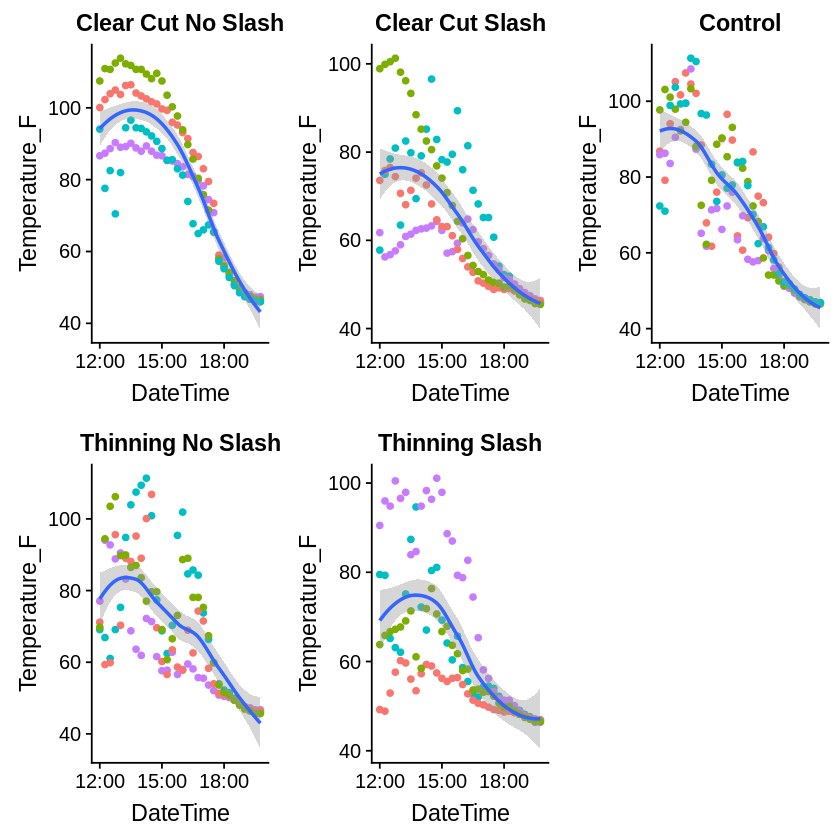

In [15]:

Mar1 <- ggplot(MarCCNslash, aes(x = DateTime, y = Temperature_F )) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Clear Cut No Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Mar2 <- ggplot(MarCCslash, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+ 
                ggtitle("Clear Cut Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Mar3 <- ggplot(MarControl, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Control")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Mar4 <- ggplot(MarThinNSlash, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Thinning No Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Mar5 <- ggplot(MarThinSlash, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Thinning Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")

Mar28<- plot_grid(Mar1,Mar2,Mar3,Mar4,Mar5)
Mar28

In [16]:
BeeSwarmMar28 <- ggplot(MarLogger, aes(Treatment, Temperature_F, color = Treatment))+geom_jitter()
#BeeSwarmMar28

setwd('/home/zeski/Documents/Data_Science/Data_Exploration/FinalProject')
save_plot("Mar28.png", Mar28,
        nrow = 2,
        ncol = 3, 
        base_aspect_ratio = 1.0)

## April 4th

The dates for this period were a too much, the loggers started recording the night before instead of just prior to the fire like on Mar28th. The fires started just before noon. So I am boolean filtering for the correct times to show increase in fire and the decrease over period of time.

Case below:


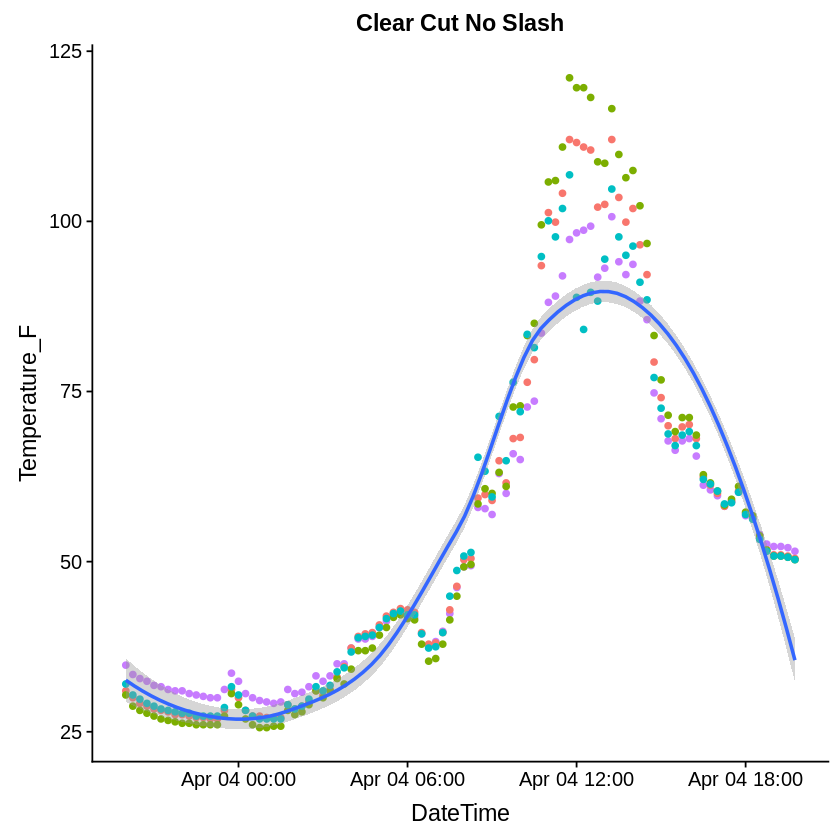

In [17]:
ggplot(Apr4CCNslash, aes(x = DateTime, y = Temperature_F )) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Clear Cut No Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")

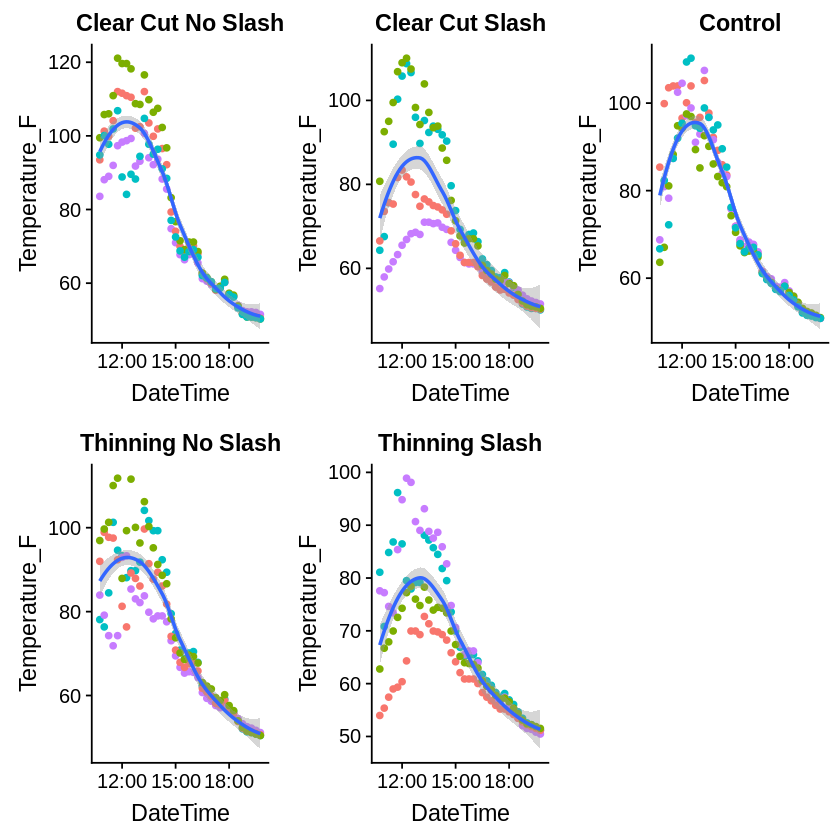

In [18]:
Apr4CCNslashC   <- Apr4CCNslash   %>% filter(DateTime > "2016-04-04 10:30")
Apr4CCslashC    <- Apr4CCslash    %>%  filter(DateTime > "2016-04-04 10:30")
Apr4ControlC    <- Apr4Control    %>% filter(DateTime > "2016-04-04 10:30")
Apr4ThinNSlashC <- Apr4ThinNSlash %>% filter(DateTime > "2016-04-04 10:30")
Apr4ThinSlashC  <- Apr4ThinSlash  %>% filter(DateTime > "2016-04-04 10:30")

Apr4_1 <- ggplot(Apr4CCNslashC, aes(x = DateTime, y = Temperature_F )) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Clear Cut No Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Apr4_2 <- ggplot(Apr4CCslashC, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+ 
                ggtitle("Clear Cut Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Apr4_3 <- ggplot(Apr4ControlC, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Control")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Apr4_4 <- ggplot(Apr4ThinNSlashC, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Thinning No Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Apr4_5 <- ggplot(Apr4ThinSlashC, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Thinning Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none") 


April4<- plot_grid(Apr4_1,Apr4_2,Apr4_3,Apr4_4,Apr4_5)
April4

In [19]:
BeeSwarmApril4<- ggplot(Apr4Logger, aes(Treatment, Temperature_F, color = Treatment))+geom_jitter()
#BeeSwarmApril4

save_plot("April4.png", April4,
        nrow = 2,
        ncol = 3, 
        base_aspect_ratio = 1.0)

## April 11th:

Same issue as on April 4th: 

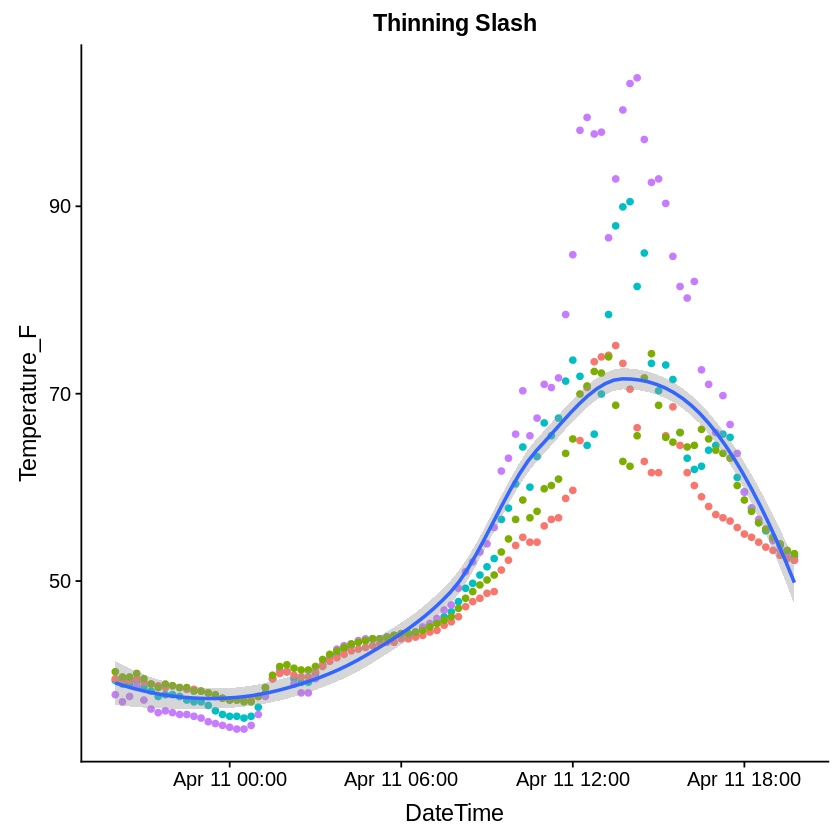

In [20]:
ggplot(Apr11ThinSlash, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Thinning Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none") 

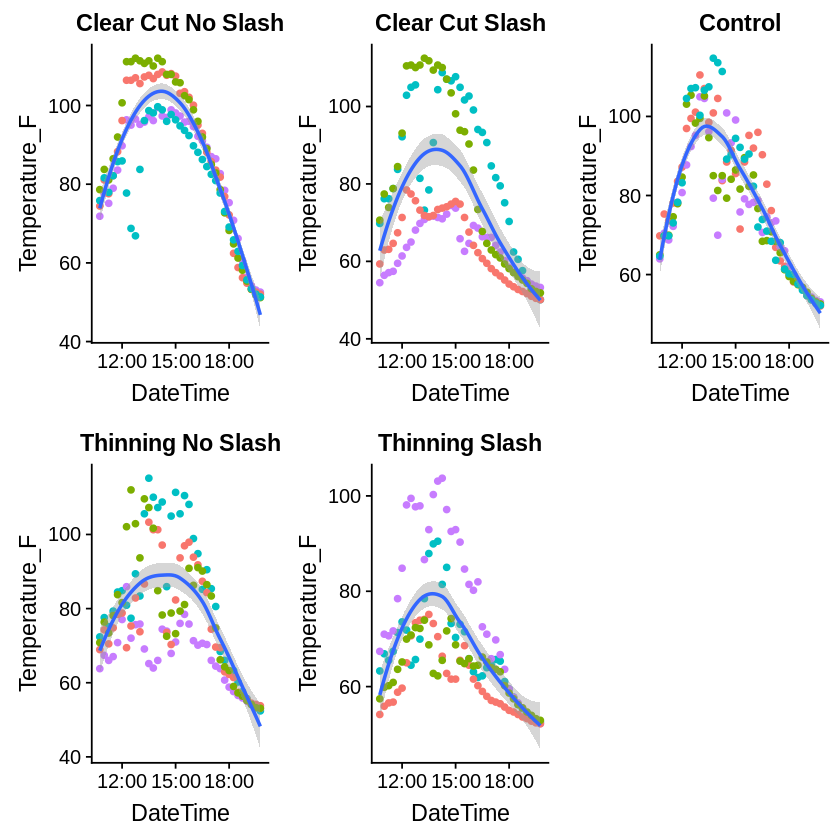

In [21]:
Apr11CCNslashC   <- Apr11CCNslash   %>% filter(DateTime > "2016-04-11 10:30")
Apr11CCslashC    <- Apr11CCslash    %>%  filter(DateTime > "2016-04-11 10:30")
Apr11ControlC    <- Apr11Control    %>% filter(DateTime > "2016-04-11 10:30")
Apr11ThinNSlashC <- Apr11ThinNSlash %>% filter(DateTime > "2016-04-11 10:30")
Apr11ThinSlashC  <- Apr11ThinSlash  %>% filter(DateTime > "2016-04-11 10:30")

Apr11_1 <- ggplot(Apr11CCNslashC, aes(x = DateTime, y = Temperature_F )) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Clear Cut No Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Apr11_2 <- ggplot(Apr11CCslashC, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+ 
                ggtitle("Clear Cut Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Apr11_3 <- ggplot(Apr11ControlC, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Control")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Apr11_4 <- ggplot(Apr11ThinNSlashC, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Thinning No Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none")
Apr11_5 <- ggplot(Apr11ThinSlashC, aes(x = DateTime, y = Temperature_F)) + 
                geom_point(aes(color = Hobologger))+
                ggtitle("Thinning Slash")+
                geom_smooth(method = 'loess', formula = 'y~x')+
                theme(legend.position = "none") 

April11<- plot_grid(Apr11_1,Apr11_2,Apr11_3,Apr11_4,Apr11_5)
April11

BeeSwarmApril11<- ggplot(Apr11Logger, aes(Treatment, Temperature_F, color = Treatment))+geom_jitter()
#BeeSwarmApril11

save_plot("April11.png", April11,
        nrow = 2,
        ncol = 3, 
        base_aspect_ratio = 1.0)

## Section 3: Analysis

In [22]:
KruskalTest



	Kruskal-Wallis rank sum test

data:  TempF by Treatment
Kruskal-Wallis chi-squared = 224.87, df = 4, p-value < 2.2e-16


<br>Looking at this Kruskal Wallis test, we can see that there is a difference between the silvacultural treatments and the fire temperature for each treatment area.

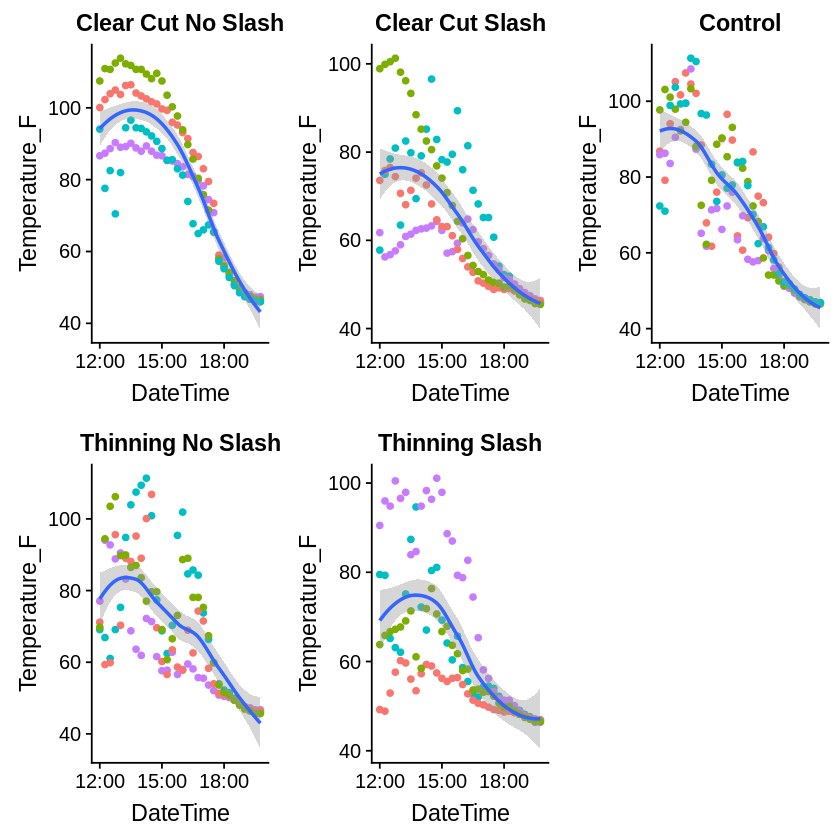

In [23]:
Mar28

<br>
This is the initial day that burning was performed on the silvacultural areas. Examining each graph and the fitted line, we can see that the intensity of of the fires/temperature vary across the different sites. The sites with the longer and more shallow curve have a recorded temperature that is higher across time, it takes more time for the temperature to drop. This can be attributed to the composition of each site, the downed fuel load, density of the forest, slash present or not, etc. As we can see, the site with the steepest of curves is the clear cut no slash area. This means that there is no remnant of downed trees on the forest floor, and there are mainly smaller fuels. Compare this with the shallower curve for the clear cut with the slash and we can see the difference between the two areas. The clear cut slash has thicker fuels(tree trunks remaining from the clear cut) on the forest fuel that take longer to burn, hence you see the stark differences in the curve. The area with the slash is burning longer, hence the shallower curve in the temperature drop. Again we can observe the same occurence with the two thinning, a thinned plot where 50% of the canopy cover is removed. The thinned slash area is the area where the cut trees are placed on the ground as slash remains. The control area is an area where no silvacultural treatment is performed. 

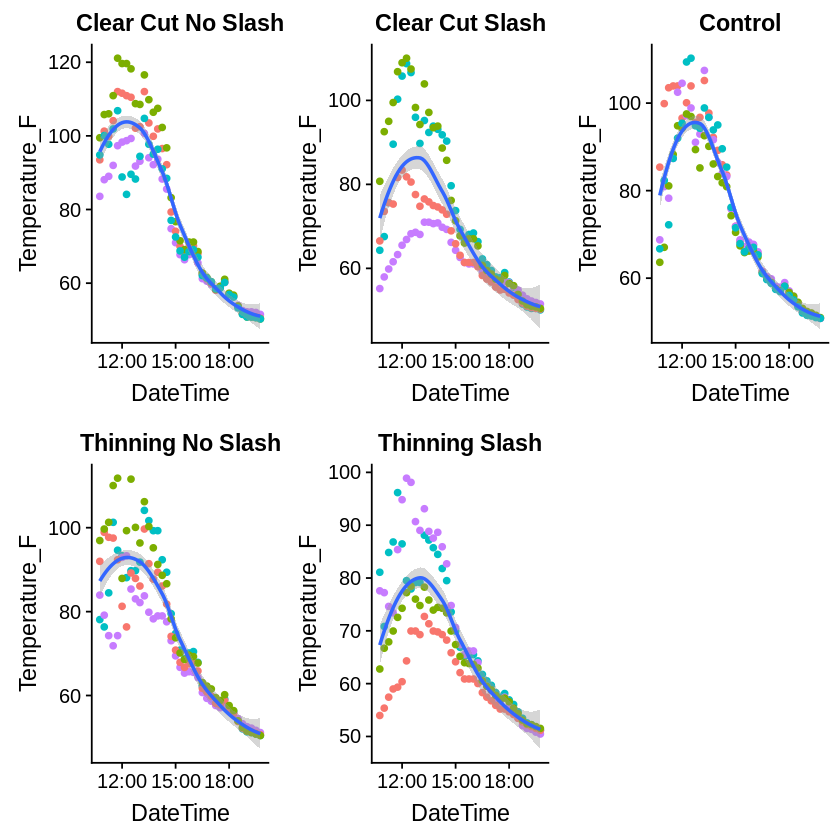

In [24]:
April4

This is the second burn performed on campus, we can see that the variation is not nearly as noticeable as in the first day. This can be presumed to be because of the intitial burn and the loss of downed woody fuels on the forest floor. As the thicker fuels burn, this reduces them to smaller fuel substances, hence the decrease in variation between the fitted lines.

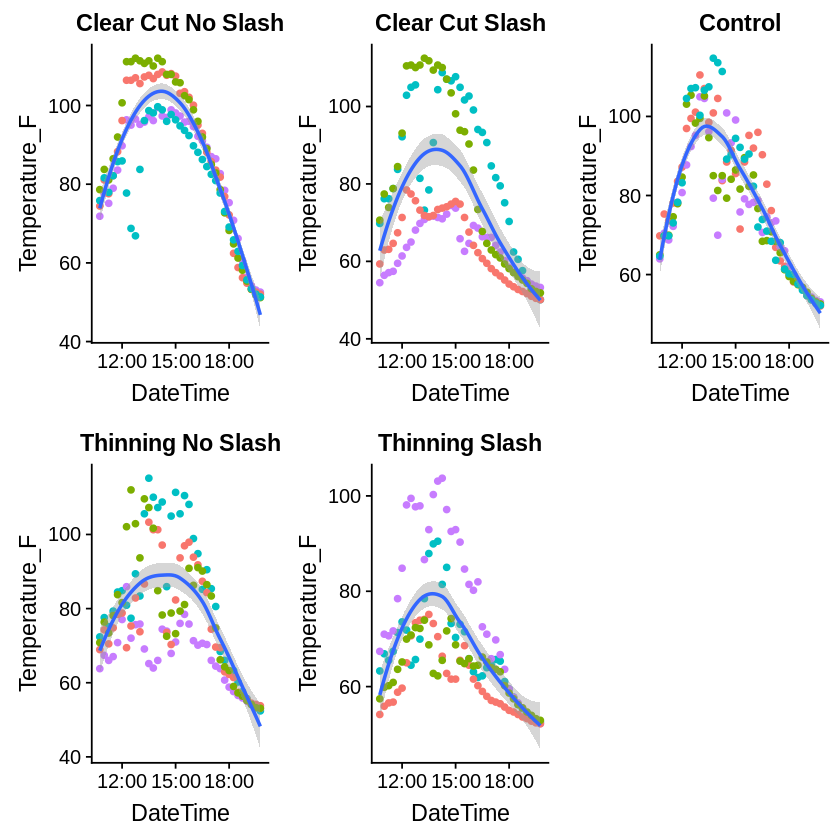

In [25]:
April11

Finallly, examining the fitted lines in the final plot, we can see that they are indeed becoming more and more similar as the burns progress.

### Limitations:

I talked a lot about the fuel load compositions and the theoretical explanation behind the curves becoming more and more similar to one another. While this is most likely associated to the decrease in downed woody fuels, we cannot say for sure unless there is a sufficient collcection of fuel data before and after each burn to run a comparison on.
A lot more data needs to be collected to know what truly influences the differences in burn time between different areas. This will have to be an experiment repeated yearly to see changes over time. Furthermore, this will have to be something repeated across several areas outside of Stockton University.